# Lec 01. Intro to Machine Learning #

In [1]:
# 먼저 matplotlib 이라는 visualization 라이브러리를 import 해볼게요.
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
from tqdm import tqdm
%matplotlib inline

In [2]:
# 그래프를 그려봐요!
def plot(X, Y, Y_est=None):
    plt.scatter(X, Y)
    plt.xlabel('X')
    plt.ylabel('Y')
    
    if Y_est != None:        
        plt.plot(X, Y_est, 'b--')
    
    plt.show()

## Assignment 01. Curve Fitting ##

### Review of Lecture ###

회합은 잘 마치셨나요? 이번 시간에 배웠던 내용들을 되짚어봅시다.  

**모델(Model)** : 데이터를 설명하기 위한 일종의 가설 (ex: $y={Wx+b}$)  
**모수(Parameter)** : 모델에서 바뀔 수 있는 변수(Variable) (ex: $W$, $b$)  
**오차 함수(Error Function)** : 실제 값과 모델이 예측한 값의 차이를 계산한 함수 (ex: MSE[Mean Squared Error] $E = {{1 \over 2}{\sum_{k=1}^N (y_k - t_k)^2}}$)  
**학습 알고리즘** : 주어진 모델과 오차 함수를 바탕으로 모델이 가장 최적(Optimal)한 모수(Parameter)를 찾을 수 있도록 학습시키는 알고리즘.  
**Simple Weight Optimization**
- gradient = 1
- 반복
  - w를 gradient가 1이면 -0.1, gradient가 -1이면 +0.1을 더한다.
  - 만약 Loss가 이전보다 커지면 gradient = 1 작아지면 gradient = -1로 Update  

### Assignment ###
자, Line Fitting은 해보았으니, 이제 Curve Fitting을 해볼게요.  
Curve Fitting의 모델은 아래와 같은 다항식(Polynomial)을 Fitting하게 됩니다!  

$$ y = w_0 + w_1x^1 + w_2x^2 +\ ...\ + w_Dx^D = \sum^D_{k=0}w_kx^k $$

우선 아래와 같은 데이터가 있다고 해볼게요!

X: [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
Y: [100.  84.  70.  58.  48.  40.  34.  30.  28.  28.  30.  34.  40.  48.
  58.  70.  84. 100. 118. 138. 160.]


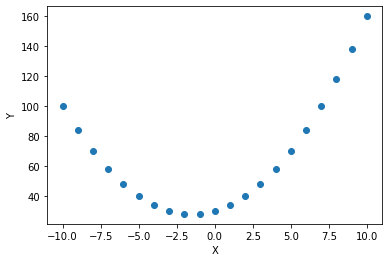

In [3]:
# x값은 0부터 20까지로 설정해볼게요.
X = np.array(np.linspace(start=-10, stop=10, num=21))
Y = np.array([100.,  84.,  70.,  58.,  48.,
              40.,   34.,  30.,  28.,  28., 
              30.,   34.,  40.,  48.,  58., 
              70.,   84., 100., 118., 138., 160.])

print('X:', X)
print('Y:', Y)
plot(X, Y)

## 과제 명세
위에 주어진 데이터를 바탕으로 가장 알맞는 모델을 찾는 코드를 작성해주세요!  
함수 fit 안의 내용을 채워주시면 됩니다.
- 함수 fit(X,Y)의 입력은 X와 Y, 위에서 주어진 np.array([...])로 한다.
- 함수 fit(X,Y)의 출력은 모델의 계수(coefficient)들 역시 np.array([...])로 반환한다.
- fit(X, Y)는 parameter들을 차수가 낮은 순서대로 리턴한다.
  - ex : x^2 + 5x + 10 -> [10, 5, 1]

### Tips

> **벡터의 내적** : Python의 numpy에서는 dot를 통해 벡터의 내적이 됩니다!

In [4]:
v1 = np.array([1,2,3,4,5])
v2 = np.array([3,4,5,4,3])

print(v1*v2)
print("v1벡터와 v2백터의 내적은? :", v1.dot(v2))

[ 3  8 15 16 15]
v1벡터와 v2백터의 내적은? : 57


> **함수 f의 계산** : 주어진 parameters로 구성된 함수 f의 값은 아래와 같이 계산할 수 있습니다.

In [5]:
def f(parameters, x):
    res = 0
    for i in range(len(parameters)):
        res += parameters[i] * (x ** i)
    return res

################ Test ################
params = [1, 2, 3, 4]
print("f(x) = ", end='')
for i in range(len(params)-1, -1, -1):
    if i>0:
        print("{}x^{} + ".format(params[i], i), end='')
    else:
        print(params[i])
print("f(3) =",f(params, 3))
######################################

f(x) = 4x^3 + 3x^2 + 2x^1 + 1
f(3) = 142


> **Algorithm** : 지난번엔 정말 간단한 알고리즘을 드렸지만, 이번 문제에 적용하면 잘 안될 수도 있습니다! 아래 알고리즘을 고려해보세요.

- weight vector $W$ = [0, 0, 0, 0, ...]으로 초기화!
- 모델 $f(X) =  \sum^D_{k=0}w_kx^k $
- 데이터 $X$, $Y$
- 반복 (3000번정도)
  - 예측(Predict) : $\hat Y = f(X)$ 
  - 에러(Error) 계산 : $e = \hat Y - Y$
  - 업데이트(Update) -> 반복 : j 를 0부터 W의 원소 개수까지 (다항식의 차수)
    - $gradient = e \cdot X^j$ (벡터의 내적 : error vector와 X의 j제곱 벡터를 내적)
    - 만약 gradient가 양수면
      - gradient -= 0.01
    - 만약 gradient가 음수면
      - gradient += 0.01

> **Plotting** : 아래 코드로 현재 모델의 그래프를 확인할 수 있습니다.

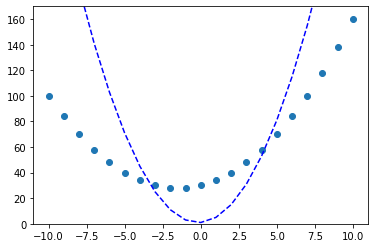

In [6]:
def VisualizeModel(parameters, X, save_idx=None):
    T = [ f(parameters, i) for i in X]
    plt.clf()
    plt.scatter(X, Y)
    plt.plot(X, T, 'b--')
    plt.xlim(-11, 11)
    plt.ylim(0, 170)

    if save_idx != None:
        if not os.path.exists("gifs"):
            os.mkdir("gifs")
        plt.savefig("gifs/" + str(save_idx).zfill(5) + ".png")
    else:
        plt.show()
        
VisualizeModel([1., 1., 3.], X, save_idx=0)

**save_idx를 지정한다면 아래 코드로 gif로 학습 결과를 보실 수 있습니다!**

In [7]:
gifs = os.listdir("gifs")
gifs.sort()
with imageio.get_writer('train.gif', mode='I') as writer:
    for filename in tqdm(gifs):
        image = imageio.imread("gifs/"+filename)
        writer.append_data(image)

100%|██████████| 1/1 [00:00<00:00, 120.08it/s]


## 여기 아래부터 코드를 작성해주세요!

In [8]:
############### 이 부분을 작성하여 메일로 보내주세요. ###############

def fit(X, Y):
    W = np.array([0., 0., 0.])
    
    # 이 안의 코드를 작성하여 주세요
    
    return W

############### 이 부분을 작성하여 메일로 보내주세요. ###############